# Data Structures and Algorithms Final Project
#### Authors: Victoria Blante, Chelyah Miller, Emma Juan Salazar
#### Date Created: 11/29/2024
#### Last Edited: 12/2/2024

## Library Importation

In [476]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
import time

## The Real Estate Market in India: Organizing a dataset with a Binary Search Tree

This dataset contains real estate property listings from different parts of India. The dataset includes a variety of properties, with each entry containing information such as the price, location, area, and several features like the number of bedrooms, gym availability, and parking facilities. The dataset serves as a representation of the available properties in Bangalore, focusing on both resale and new properties.


#### The datasets found here: [Housing Prices in Metropolitan Areas of India](https://www.kaggle.com/datasets/ruchi798/housing-prices-in-metropolitan-areas-of-india)

We create a file for each dataset that we can utilize. In total we have 6 files of varying size: 

In [477]:
#! for file in data/*; do wc -l $file; done;

### Taking a look at one dataset

In [478]:
bangalore = pd.read_csv("data/Bangalore.csv")

In [479]:
bangalore.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [480]:
bangalore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6207 entries, 0 to 6206
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                6207 non-null   int64 
 1   Area                 6207 non-null   int64 
 2   Location             6207 non-null   object
 3   No. of Bedrooms      6207 non-null   int64 
 4   Resale               6207 non-null   int64 
 5   MaintenanceStaff     6207 non-null   int64 
 6   Gymnasium            6207 non-null   int64 
 7   SwimmingPool         6207 non-null   int64 
 8   LandscapedGardens    6207 non-null   int64 
 9   JoggingTrack         6207 non-null   int64 
 10  RainWaterHarvesting  6207 non-null   int64 
 11  IndoorGames          6207 non-null   int64 
 12  ShoppingMall         6207 non-null   int64 
 13  Intercom             6207 non-null   int64 
 14  SportsFacility       6207 non-null   int64 
 15  ATM                  6207 non-null   int64 
 16  ClubHo

#### Key Features:
- Price: The listing price of the property.
- Area: The size of the property in square feet.
- Location: The locality where the property is located.
- No. of Bedrooms: The number of bedrooms in the property.
- Amenities: Information about available amenities such as the gym, swimming pool, 24x7 security, etc.

We'll use **Price** as the variable by which to organize this dataset.

This is what extracting one property from the dataset (saved as a pandas DataFrame) would look like.

In [481]:
property = bangalore.iloc[0]

In [482]:
property

Price                          30000000
Area                               3340
Location               JP Nagar Phase 1
No. of Bedrooms                       4
Resale                                0
MaintenanceStaff                      1
Gymnasium                             1
SwimmingPool                          1
LandscapedGardens                     1
JoggingTrack                          1
RainWaterHarvesting                   1
IndoorGames                           1
ShoppingMall                          0
Intercom                              1
SportsFacility                        1
ATM                                   0
ClubHouse                             1
School                                0
24X7Security                          1
PowerBackup                           1
CarParking                            0
StaffQuarter                          0
Cafeteria                             0
MultipurposeRoom                      0
Hospital                              0


In [483]:
property['Price']

30000000

In [484]:
property[1:]

Area                               3340
Location               JP Nagar Phase 1
No. of Bedrooms                       4
Resale                                0
MaintenanceStaff                      1
Gymnasium                             1
SwimmingPool                          1
LandscapedGardens                     1
JoggingTrack                          1
RainWaterHarvesting                   1
IndoorGames                           1
ShoppingMall                          0
Intercom                              1
SportsFacility                        1
ATM                                   0
ClubHouse                             1
School                                0
24X7Security                          1
PowerBackup                           1
CarParking                            0
StaffQuarter                          0
Cafeteria                             0
MultipurposeRoom                      0
Hospital                              0
WashingMachine                        0


### Property IDs

We'll define an ID for each propertie so we have a string that's unique to each one.

We'll use the city and the index in the csv file.

To identify the cities we'll use City Codes (Airport IATA Codes).

These codes are commonly used for airports but often represent the city as a whole:

- Bangalore: BLR (Kempegowda International Airport)
- Chennai: MAA (Chennai International Airport)
- Delhi: DEL (Indira Gandhi International Airport)
- Hyderabad: HYD (Rajiv Gandhi International Airport)
- Kolkata: CCU (Netaji Subhas Chandra Bose International Airport)
- Mumbai: BOM (Chhatrapati Shivaji Maharaj International Airport)

And for the index of the property in the csv file we'll use numbers from 1 to 9999 (since the longest of our datasets has approx 7k lines).

We'll pad this number so it's 4 digits.

In [485]:
def property_id(city: str, index: int):
    city_codes = {"bangalore": "BLR", "chennai": "MAA", "delhi": "DEL",
                  "hyderabad": "HYD", "kolkata": "CCU", "mumbai": "BOM"}
    return f"{city_codes[city.lower()]}-{str(index).zfill(4)}"

In [486]:
property_id("Bangalore", 32)

'BLR-0032'

## 1. Implementation of the BST

### Defining the BST structure

First we'll define a **Node**.

This is the object that makes up our BST.

In our case, each node will represent a **Price Point**. To each of these nodes, we'll attach however many properties are currently at that price point.

In [487]:
class Node:
	def __init__(self, price: int, id: str, details: pd.Series):
		"""
		A TreeNode has three main attributes:
			- a key
			- a pointer to the left child
			- a pointer to the right child
		We'll add variable that will store all properties this price point.
		When initializing, we need at least one property per price point.
		Each property:
			- is identified by their id
			- has a series of characteristics stored in a pandas Series
		"""
		self.price = price
		self.left = None
		self.right = None
		self.height = 1 
		self.properties = {id: details}

	def add_property(self, id: str, details: pd.Series):
		"""
		This method will add a property to the node.
		- We'll use the id to identify the property
		- We'll store the details of the property in the form of a pd.Series
		"""
		self.properties[id] = details

	def delete_property(self, id: str):
		if id in self.properties:
			del self.properties[id]
		else:
			print(f"Property {id} not found at price point {self.price}")

	def property_ids(self):
		""" Get a list of the IDs of all the properties at this price point """
		return list(self.properties.keys())
	
	def nb_properties(self):
		""" Get the number of properties at this nodes' price point """
		return len(self.properties)

In [488]:
class BinarySearchTree:
	def __init__(self):
		self.root = None

	# INSERT a property
	def insert(self, price: int, id: str, details: pd.Series):
		self.root = self._insert(self.root, price, id, details)

	def _insert(self, root, price: int, id: str, details: pd.Series):
		""" We recursively traverse the tree to find where to add our new
		property in the correct price point """
		if root is None:
			return Node(price, id, details)
		if price < root.price:
			root.left = self._insert(root.left, price, id, details)
		elif price > root.price:
			root.right = self._insert(root.right, price, id, details)
		else:
			# in case a node with the current price exists, we add the property
			root.add_property(id, details)
		
		root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

		balance = self.get_balance(root)

		# Left-Left (Rotate Right)
		if balance > 1 and price < root.left.price:
			return self.rotate_right(root)

		# Right-Right (Rotate Left)
		if balance < -1 and price > root.right.price:
			return self.rotate_left(root)

		# Left-Right (Left Rotate, then Right Rotate)
		if balance > 1 and price > root.left.price:
			root.left = self.rotate_left(root.left)
			return self.rotate_right(root)

		# Right-Left (Right Rotate, then Left Rotate)
		if balance < -1 and price < root.right.price:
			root.right = self.rotate_right(root.right)
			return self.rotate_left(root)
		
		return root

	#BALANCING HELPERS
	def get_height(self, node):
		if not node:
			return 0
		
		return node.height

    # Get balance factor of a node
	def get_balance(self, node):
		if not node:
			return 0
		return self.get_height(node.left) - self.get_height(node.right)

    # Right rotation
	def rotate_right(self, z):
		y = z.left
		T3 = y.right

		# Perform rotation
		y.right = z
		z.left = T3

		# Update heights
		z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
		y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

		# Return new root
		return y

    # Left rotation
	def rotate_left(self, z):
		y = z.right
		T2 = y.left

		# Perform rotation
		y.left = z
		z.right = T2

		# Update heights
		z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
		y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

		# Return new root
		return y

	# SEARCH: method -> Binary Search Algorithm
	def search(self, price):
		return self._search(self.root, price)

	def _search(self, root, price):
		""" We recursively traverse the tree until we find a the node at the
		specified price point """
		if root is None or root.price == price:
			return root
		if price < root.price:
			return self._search(root.left, price)
		return self._search(root.right, price)
	
	# DELETE A PROPERTY
	def delete_property(self, price, id):
		node = self.search(price)
		if node:
			node.delete_property(id)
			self.root = self._rebalance(self.root, price)
	
	def _rebalance(self, root, price):
		"""Rebalances the tree if necessary after a deletion."""
		if root is None:
			return root

		root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))
		balance = self.get_balance(root)

		# Left-Left (Rotate Right)
		if balance > 1 and self.get_balance(root.left) >= 0:
			return self.rotate_right(root)

		# Right-Right (Rotate Left)
		if balance < -1 and self.get_balance(root.right) <= 0:
			return self.rotate_left(root)

		# Left-Right (Left Rotate, then Right Rotate)
		if balance > 1 and self.get_balance(root.left) < 0:
			root.left = self.rotate_left(root.left)
			return self.rotate_right(root)

		# Right-Left (Right Rotate, then Left Rotate)
		if balance < -1 and self.get_balance(root.right) > 0:
			root.right = self.rotate_right(root.right)
			return self.rotate_left(root)

		return root
	
	# Tree attributes
	def size(self):
		""" Returns the size of the tree: total number of nodes
		(number of unique price points) """
		return self._size(self.root)

	def _size(self, node):
		if node is None:
			return 0
		else:
			return 1 + self._size(node.left) + self._size(node.right)
		
	def total_nb_properties(self):
		""" Returns the total number of properties in the tree. """
		return self._total_nb_properties(self.root)
	
	def _total_nb_properties(self, node):
		if node is None:
			return 0
		else:
			return node.nb_properties() + \
					self._total_nb_properties(node.left) + \
					self._total_nb_properties(node.right)

Now we'll define a function that will generate a BST from a dataset (stored in a pandas DataFrame)

In [489]:
def BST_from_dataset(city: str, dataset: pd.DataFrame):

    print(f"Building a BST for the dataset of {city}.")
    start = time.time()
    bst = BinarySearchTree()

    for i in range(len(dataset)):
        # We extract the property from the DataFrame -> pd.Series
        property = dataset.iloc[i]

        # We define the ID for the property
        id = property_id(city, i)

        # We insert the property on our tree.
        # The Price is indexed under 'Price' (at position 0)
        # and the rest of the Series are the other details
        bst.insert(price=property['Price'], id=id, details=property[1:])

    print(f"Execution time {time.time() - start:.4f}")

    return bst

In [490]:
def BST_from_csv(city: str, filename: str):

    print(f"Building a BST for the dataset of {city}.")
    start = time.time()
    bst = BinarySearchTree()

    # Open the CSV file
    i = 0
    with open(filename, mode="r") as file:
        # Read the first line as the header
        header = file.readline().strip().split(",")[1:]

        # Iterate over the remaining lines
        for line in file:
            property = line.strip().split(',')
            id = property_id(city, i)
            bst.insert(price=int(property[0]),
                       id=id,
                       details=pd.Series(data=property[1:], index=header))
            i += 1

    print(f"Execution time {time.time() - start:.4f}")

    return bst

### Creating the Bangalore BST

In [491]:
bangalore_bst = BST_from_csv("Bangalore", "data/Bangalore.csv")

Building a BST for the dataset of Bangalore.


Execution time 1.6070


In [492]:
bangalore_bst = BST_from_dataset("Bangalore", bangalore)

Building a BST for the dataset of Bangalore.
Execution time 0.5986


Creating the tree directly from the CSV file is slightly faster.

Overall, the time it takes to build the tree is very small.

We can check that the size of our resulting trees equals the number of properties on our dataset.

In [493]:
len(bangalore)

6207

In [494]:
bangalore_bst.size()

2146

In [495]:
bangalore_bst.total_nb_properties()

6207

And now we can check what we have at our root for example:

In [496]:
bangalore_bst.root.price

6797000

In [497]:
bangalore_bst.root.nb_properties()

3

In [498]:
bangalore_bst.root.property_ids()

['BLR-0005', 'BLR-0023', 'BLR-0043']

In [499]:
bangalore_bst.root.properties['BLR-0005']

Area                       1220
Location               Horamavu
No. of Bedrooms               2
Resale                        0
MaintenanceStaff              0
Gymnasium                     1
SwimmingPool                  1
LandscapedGardens             1
JoggingTrack                  1
RainWaterHarvesting           1
IndoorGames                   1
ShoppingMall                  0
Intercom                      1
SportsFacility                1
ATM                           0
ClubHouse                     1
School                        0
24X7Security                  1
PowerBackup                   1
CarParking                    1
StaffQuarter                  0
Cafeteria                     0
MultipurposeRoom              1
Hospital                      0
WashingMachine                0
Gasconnection                 0
AC                            0
Wifi                          0
Children'splayarea            1
LiftAvailable                 1
BED                           0
VaastuCo

In [500]:
bangalore_bst.root.properties['BLR-0005']['Area']

1220

We can also delete a property from the root and add it back again.

In [501]:
# We obtain the details of the property to re add it later on.
blr_0005 = bangalore_bst.root.properties['BLR-0005']

# We delete the property from our tree:
bangalore_bst.delete_property(30000000, 'BLR-0005')

Property BLR-0005 not found at price point 30000000


In [502]:
bangalore_bst.root.property_ids()

['BLR-0005', 'BLR-0023', 'BLR-0043']

Now we can't see 'BLR-0005' anymore. Let's add it again.

In [503]:
bangalore_bst.insert(30000000, 'BLR-0005', blr_0005)

In [504]:
bangalore_bst.root.property_ids()

['BLR-0005', 'BLR-0023', 'BLR-0043']

And we've successfully added it back in!

### Querying functions

#### Properties at the median price point.

In [505]:
def inorder_traversal(root, result=None):
    if result is None:
        result = []
    if root:
        inorder_traversal(root.left, result)
        result.append(root.price)  # Store the price of the node
        inorder_traversal(root.right, result)
    return result

def find_median(root):
    nodes = inorder_traversal(root)
    n = len(nodes)
    return nodes[n // 2]

def median_properties(bst):
    median_price = find_median(bst.root)
    node = bst.search(median_price)
    print(f"Median price: {median_price}")
    print(f"{node.nb_properties()} property/ies priced at {node.price}.")
    return node.properties

In [506]:
median_properties(bangalore_bst)

Median price: 6581000
1 property/ies priced at 6581000.


{'BLR-0216': Area                       1181
 Location               Horamavu
 No. of Bedrooms               2
 Resale                        0
 MaintenanceStaff              0
 Gymnasium                     1
 SwimmingPool                  1
 LandscapedGardens             1
 JoggingTrack                  1
 RainWaterHarvesting           1
 IndoorGames                   1
 ShoppingMall                  0
 Intercom                      1
 SportsFacility                1
 ATM                           0
 ClubHouse                     1
 School                        0
 24X7Security                  1
 PowerBackup                   1
 CarParking                    1
 StaffQuarter                  0
 Cafeteria                     0
 MultipurposeRoom              1
 Hospital                      0
 WashingMachine                0
 Gasconnection                 0
 AC                            0
 Wifi                          0
 Children'splayarea            1
 LiftAvailable                 

#### Properties at the cheapest price point.

In [507]:
def cheapest_properties(bst):
    """ We traverse the tree always going towards the left child since the
    price will be smaller."""
    node = bst.root
    while node.left:
        node = node.left
    print(f"Lowest price: {node.price}")
    print(f"{node.nb_properties()} property/ies priced at {node.price}.")
    return node.properties

In [508]:
cheapest_properties(bangalore_bst)

Lowest price: 2000000
1 property/ies priced at 2000000.


{'BLR-5099': Area                            2730
 Location               Sarjapur Road
 No. of Bedrooms                    4
 Resale                             0
 MaintenanceStaff                   9
 Gymnasium                          9
 SwimmingPool                       9
 LandscapedGardens                  9
 JoggingTrack                       9
 RainWaterHarvesting                9
 IndoorGames                        9
 ShoppingMall                       9
 Intercom                           9
 SportsFacility                     9
 ATM                                9
 ClubHouse                          9
 School                             9
 24X7Security                       9
 PowerBackup                        9
 CarParking                         9
 StaffQuarter                       9
 Cafeteria                          9
 MultipurposeRoom                   9
 Hospital                           9
 WashingMachine                     9
 Gasconnection                      9


#### Properties at the most expensive price point.

In [509]:
def most_expensive_properties(bst):
    """ We traverse the tree always going towards the left child since the
    price will be smaller."""
    node = bst.root
    while node.right:
        node = node.right
    print(f"Highest price: {node.price}")
    print(f"{node.nb_properties()} property/ies priced at {node.price}.")
    return node.properties

In [510]:
most_expensive_properties(bangalore_bst)

Highest price: 300000000
1 property/ies priced at 300000000.


{'BLR-4834': Area                           785
 Location               Bommasandra
 No. of Bedrooms                  2
 Resale                           0
 MaintenanceStaff                 9
 Gymnasium                        9
 SwimmingPool                     9
 LandscapedGardens                9
 JoggingTrack                     9
 RainWaterHarvesting              9
 IndoorGames                      9
 ShoppingMall                     9
 Intercom                         9
 SportsFacility                   9
 ATM                              9
 ClubHouse                        9
 School                           9
 24X7Security                     9
 PowerBackup                      9
 CarParking                       9
 StaffQuarter                     9
 Cafeteria                        9
 MultipurposeRoom                 9
 Hospital                         9
 WashingMachine                   9
 Gasconnection                    9
 AC                               9
 Wifi           

## 2. Visualization

## 3. Discussion: BST vs. other data structures

#### Functions: 

In [511]:
def suppress_print(func):
    """Decorator to suppress print statements within a function"""
    def wrapper(*args, **kwargs):
        # Backup the original stdout
        original_stdout = sys.stdout
        # Redirect stdout to os.devnull to suppress print output
        sys.stdout = open(os.devnull, 'w')
        result = func(*args, **kwargs)
        # Restore the original stdout
        sys.stdout = original_stdout
        return result
    return wrapper

In [512]:
def measure_runtime_with_BST_from_dataset(file_path, city="Bangalore"):
    """
    Measures runtime for min, max, and median queries for BST, Array, and Hash Table.
    Suppresses print statements from the called functions.
    :param file_path: Path to the CSV file.
    :param city: City name for property ID generation.
    :return: DataFrame summarizing runtimes for queries.
    """
    # Load data from CSV
    dataset = pd.read_csv(file_path)
    results = []

    # BST Test (Using BST_from_dataset)
    start = time.time()
    bst = suppress_print(BST_from_dataset)(city, dataset) 
    bst_time = (time.time() - start) * 1000

    # Time for min, max, and median queries for BST
    start = time.time()
    suppress_print(median_properties)(bst)  # Suppress print output
    suppress_print(cheapest_properties)(bst)  # Suppress print output
    suppress_print(most_expensive_properties)(bst)  # Suppress print output
    results.append({"Data Structure": "BST", "Operation": "Min Query", "Time (ms)": (time.time() - start) * 1000})
    results.append({"Data Structure": "BST", "Operation": "Max Query", "Time (ms)": (time.time() - start) * 1000})
    results.append({"Data Structure": "BST", "Operation": "Median Query", "Time (ms)": (time.time() - start) * 1000})

    # Array Test
    array = [(dataset.iloc[i]['Price'], f"ID-{i}", dataset.iloc[i][1:].to_dict()) for i in range(len(dataset))]

    # Time for min, max, and median queries for Array
    start = time.time()
    min_price_array = min(array, key=lambda x: x[0])[0]  # Min price
    max_price_array = max(array, key=lambda x: x[0])[0]  # Max price
    sorted_array = sorted(array, key=lambda x: x[0])
    median_price_array = sorted_array[len(sorted_array) // 2][0]  # Median price
    array_queries_time = (time.time() - start) * 1000

    results.append({"Data Structure": "Array", "Operation": "Min Query", "Time (ms)": array_queries_time})
    results.append({"Data Structure": "Array", "Operation": "Max Query", "Time (ms)": array_queries_time})
    results.append({"Data Structure": "Array", "Operation": "Median Query", "Time (ms)": array_queries_time})

    # Hash Table Test
    hash_table = {}
    
    # Check that 'Price' key is in every record
    for i in range(len(dataset)):
        property_data = dataset.iloc[i].to_dict()
        if 'Price' in property_data:
            hash_table[f"ID-{i}"] = property_data
        else:
            continue  # Skip the entry without 'Price'

    # Time for min, max, and median queries for Hash Table
    start = time.time()
    try:
        min_price_hash = min(hash_table.values(), key=lambda x: x['Price'])['Price']  # Min price
        max_price_hash = max(hash_table.values(), key=lambda x: x['Price'])['Price']  # Max price
        sorted_hash = sorted(hash_table.values(), key=lambda x: x['Price'])
        median_price_hash = sorted_hash[len(sorted_hash) // 2]['Price']  # Median price
    except KeyError as e:
        return pd.DataFrame(results)  # Return the partial results if there's an error

    hash_table_queries_time = (time.time() - start) * 1000

    results.append({"Data Structure": "Hash Table", "Operation": "Min Query", "Time (ms)": hash_table_queries_time})
    results.append({"Data Structure": "Hash Table", "Operation": "Max Query", "Time (ms)": hash_table_queries_time})
    results.append({"Data Structure": "Hash Table", "Operation": "Median Query", "Time (ms)": hash_table_queries_time})

    return pd.DataFrame(results)

In [513]:
def plot_grouped_histogram(df):
    # Pivot the DataFrame to group by Operation and Data Structure
    pivot_df = df.pivot(index='Operation', columns='Data Structure', values='Time (ms)')
    
    # Plot the grouped histogram
    pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
    
    # Set the title and labels
    plt.title("Query Time Comparison for Data Structures")
    plt.xlabel("Operation")
    plt.ylabel("Time (ms)")
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the legend to differentiate between data structures
    plt.legend(title="Data Structure")
    
    # Make the layout tight for better visual presentation
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [514]:
def plot_grouped_histogram_with_log_scale(df):
    # Pivot the DataFrame to group by Operation and Data Structure
    pivot_df = df.pivot(index='Operation', columns='Data Structure', values='Time (ms)')
    
    # Plot the grouped histogram
    ax = pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)
    
    # Set the title and labels
    plt.title("Query Time Comparison for Data Structures")
    plt.xlabel("Operation")
    plt.ylabel("Time (ms)")

    # Set the y-axis to a logarithmic scale
    ax.set_yscale('log')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the legend to differentiate between data structures
    plt.legend(title="Data Structure")
    
    # Make the layout tight for better visual presentation
    plt.tight_layout()
    
    # Show the plot
    plt.show()


#### Querying Time Comparison Results:

In [515]:
file_path = "data/Bangalore.csv" 
results_df = measure_runtime_with_BST_from_dataset(file_path)

results_df

,Data Structure,Operation,Time (ms)
0,BST,Min Query,1.281023
1,BST,Max Query,1.283407
2,BST,Median Query,1.283884
3,Array,Min Query,2.243519
4,Array,Max Query,2.243519
5,Array,Median Query,2.243519
6,Hash Table,Min Query,1.919508
7,Hash Table,Max Query,1.919508
8,Hash Table,Median Query,1.919508


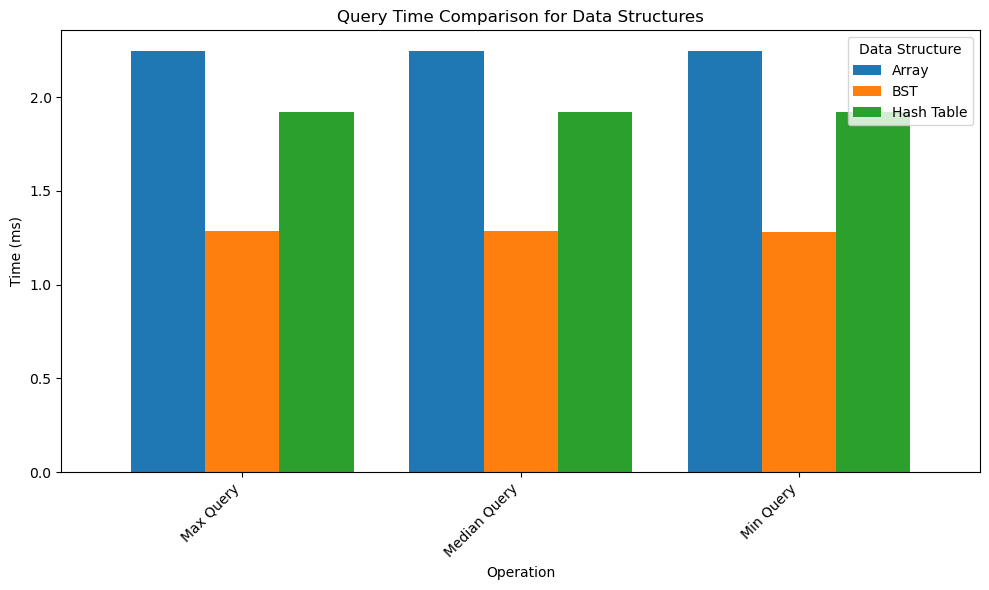

In [516]:
plot_grouped_histogram(results_df)

Binary Search Trees (BSTs) perform well with querying for minimum and maximum values due to the O(log n) complexity; however, it is slower when searching for the median due to the O(n) traversal required for an in-order search. Despite this, it is still faster than arrays and hash tables. 

Hash tables performs better than the arrays for querying minimum and maximum values but worse than the BSTs due to lack of ordering. Its median query performance is constrained by the need to sort the data but it is still faster than arrays despite occasionally being on par with the BSTs.

Arrays perform slower for querying minimum and maximum values compared to BSTs and Hash Table, as it requires scanning the entire array. The median query is slower due to the need to sort the array, which is O(n log n), unless the array is already sorted.


#### Insertion/Deletion Time Comparison Results:

In [517]:
def measure_insertion_deletion_time(file_path, city="Bangalore"):
    """
    Measures runtime for insertion and deletion operations in BST, Array, and Hash Table.
    Suppresses print statements from the called functions.
    :param file_path: Path to the CSV file.
    :param city: City name for property ID generation.
    :return: DataFrame summarizing runtimes for insertion and deletion.
    """
    # Load data from CSV
    dataset = pd.read_csv(file_path)
    results = []

    # BST Test (Using BST_from_dataset)
    start = time.time()
    bst = suppress_print(BST_from_dataset)(city, dataset)  # Create BST and suppress print output
    bst_insertion_time = (time.time() - start) * 1000

    # Time for deletion in BST
    start = time.time()
    # After insertion, delete the property with the minimum price in BST
    if bst.root is not None:
        min_price = bst.root.price  # Let's delete the node with the minimum price
        suppress_print(bst.delete_property)(min_price, None)  # Remove the property with the minimum price
    bst_deletion_time = (time.time() - start) * 1000

    results.append({"Data Structure": "BST", "Operation": "Insertion", "Time (ms)": bst_insertion_time})
    results.append({"Data Structure": "BST", "Operation": "Deletion", "Time (ms)": bst_deletion_time})

    # Array Test
    array = [(dataset.iloc[i]['Price'], f"ID-{i}", dataset.iloc[i][1:].to_dict()) for i in range(len(dataset))]

    # Time for insertion in Array
    start = time.time()
    array_insertion_time = (time.time() - start) * 1000

    # Time for deletion in Array (we remove the minimum element)
    start = time.time()
    min_price_element = min(array, key=lambda x: x[0])  # Find the min priced element
    array = [x for x in array if x[0] != min_price_element[0]]  # Delete min price element
    array_deletion_time = (time.time() - start) * 1000

    results.append({"Data Structure": "Array", "Operation": "Insertion", "Time (ms)": array_insertion_time})
    results.append({"Data Structure": "Array", "Operation": "Deletion", "Time (ms)": array_deletion_time})

    # Hash Table Test
    hash_table = {}
    
    # Check that 'Price' key is in every record
    for i in range(len(dataset)):
        property_data = dataset.iloc[i].to_dict()
        if 'Price' in property_data:
            hash_table[f"ID-{i}"] = property_data
        else:
            continue  # Skip the entry without 'Price'

    # Time for insertion in Hash Table
    start = time.time()
    hash_table_insertion_time = (time.time() - start) * 1000

    # Time for deletion in Hash Table (we remove the min priced property)
    start = time.time()
    min_price_key = min(hash_table, key=lambda x: hash_table[x]['Price'])
    del hash_table[min_price_key]  # Delete the entry with the min price
    hash_table_deletion_time = (time.time() - start) * 1000

    results.append({"Data Structure": "Hash Table", "Operation": "Insertion", "Time (ms)": hash_table_insertion_time})
    results.append({"Data Structure": "Hash Table", "Operation": "Deletion", "Time (ms)": hash_table_deletion_time})

    return pd.DataFrame(results)

In [518]:
insert_df = measure_insertion_deletion_time(file_path)
insert_df

,Data Structure,Operation,Time (ms)
0,BST,Insertion,865.406513
1,BST,Deletion,0.082731
2,Array,Insertion,0.000715
3,Array,Deletion,0.492811
4,Hash Table,Insertion,0.000715
5,Hash Table,Deletion,0.486612


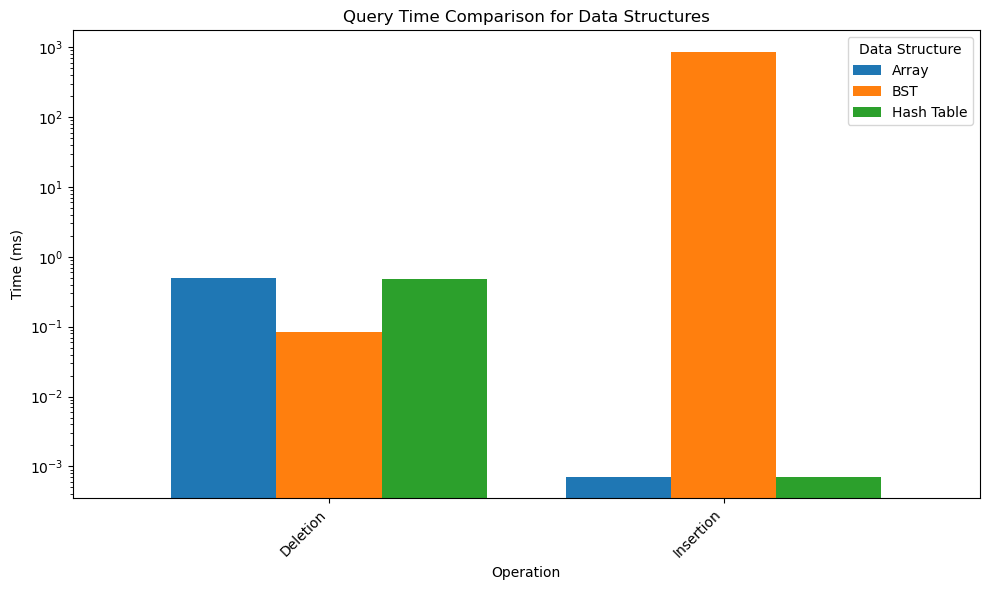

In [519]:
plot_grouped_histogram_with_log_scale(insert_df)

BSTs are slower for insertion due to the structural balancing requirements, but it's more efficient than arrays and hash tables. 

Arrays are more efficient for insertion, but the deletion is more expensive because of the element shifting. 

Hash tables are the most efficient overall for insertion and deletion, given the O(1) time complexity on average.